# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

In [14]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
lenses = fetch_ucirepo(id=58) 
  
# data (as pandas dataframes) 
X = lenses.data.features 
y = lenses.data.targets 
  
# metadata 
print(lenses.metadata) 
  
# variable information 
print(lenses.variables) 

{'uci_id': 58, 'name': 'Lenses', 'repository_url': 'https://archive.ics.uci.edu/dataset/58/lenses', 'data_url': 'https://archive.ics.uci.edu/static/public/58/data.csv', 'abstract': 'Database for fitting contact lenses', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 24, 'num_features': 3, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5K88Z', 'creators': ['J. Cendrowska'], 'intro_paper': None, 'additional_info': {'summary': 'The examples are complete and noise free. The examples highly simplified the problem. The attributes do not fully describe all the factors affecting the decision as to which type, if any, to fit.\r\n\r\n Notes:  \r\n\r\n--This database is complete (all possible combinations of attribute-value pairs are re

In [20]:
from ucimlrepo import fetch_ucirepo 
lenses = fetch_ucirepo(id=58)

print(type(lenses.data))


<class 'ucimlrepo.dotdict.dotdict'>


**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

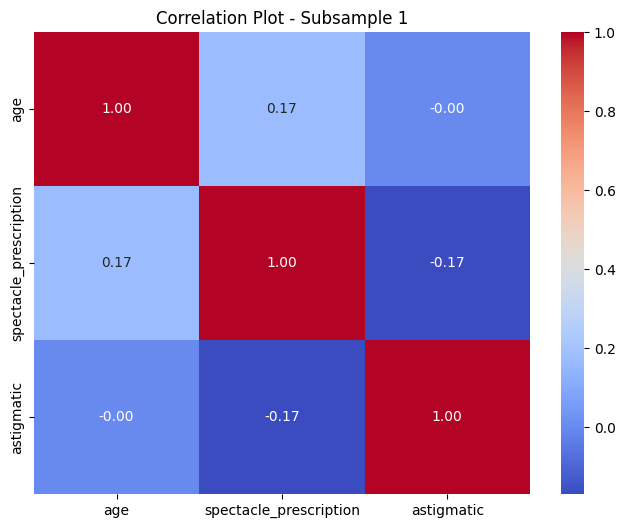

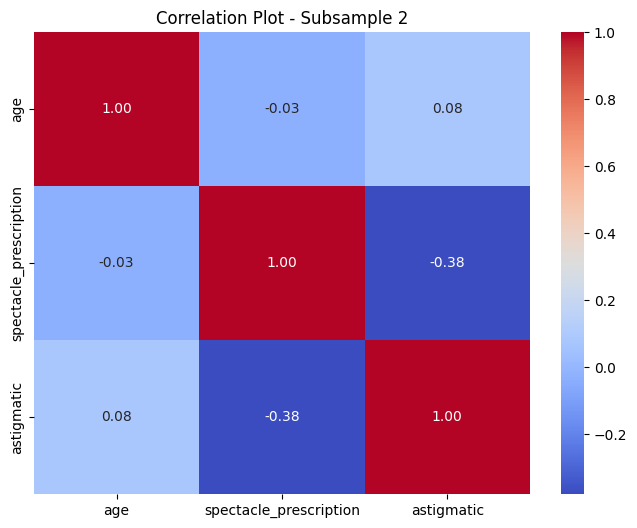

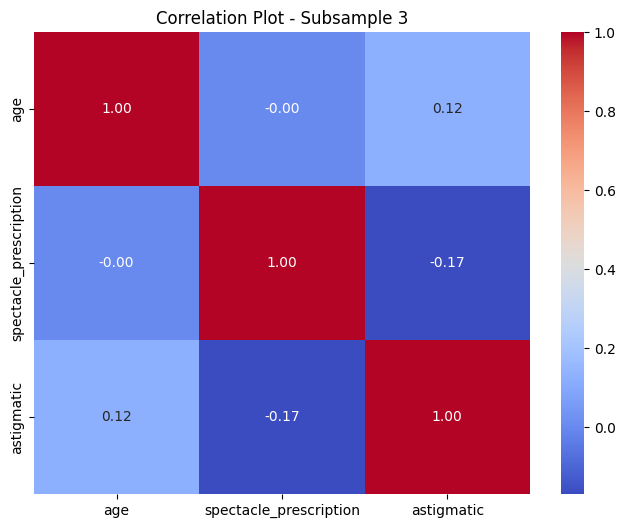

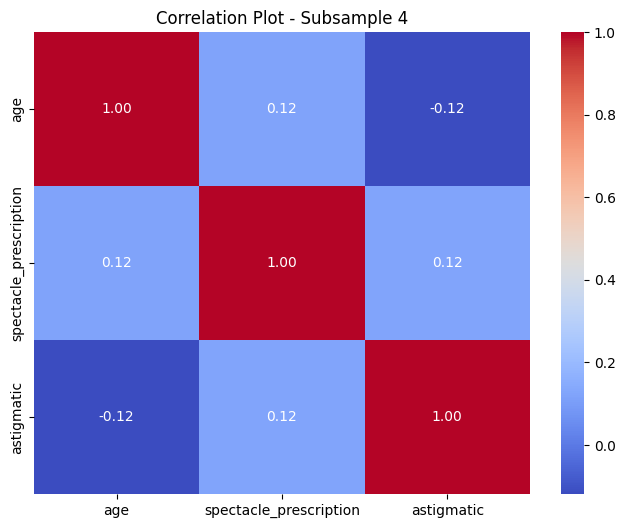

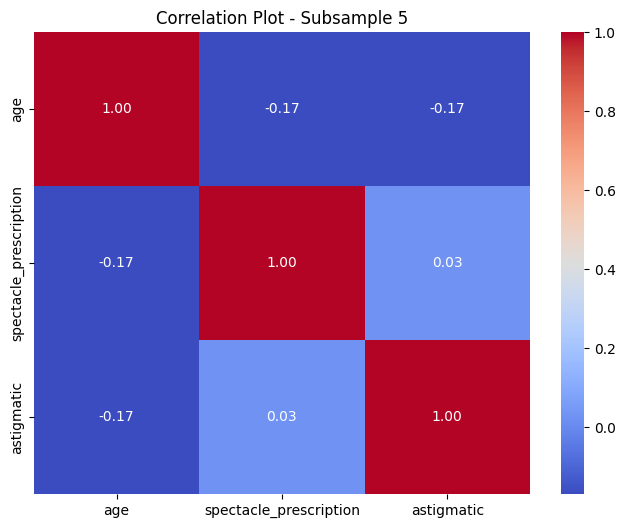

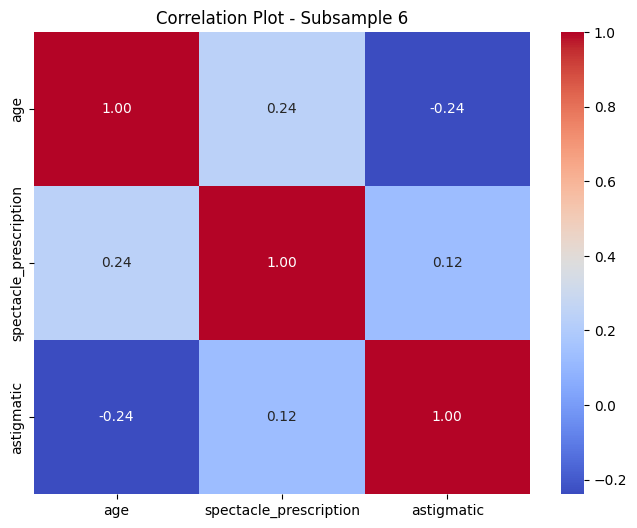

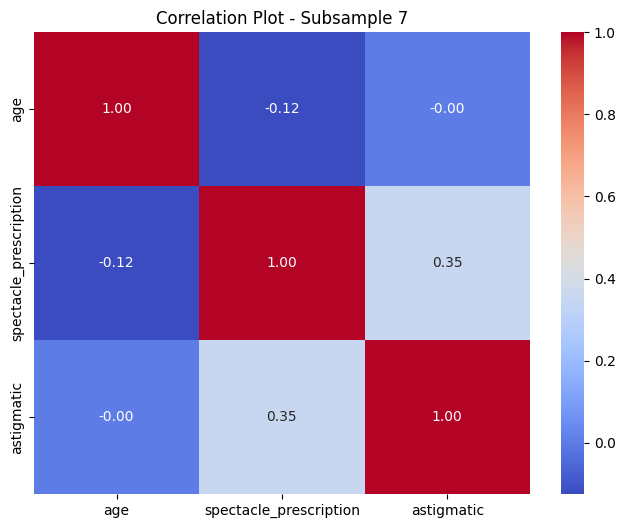

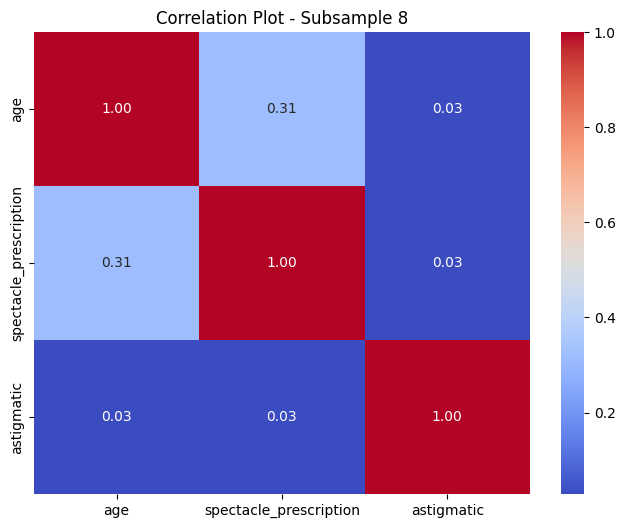

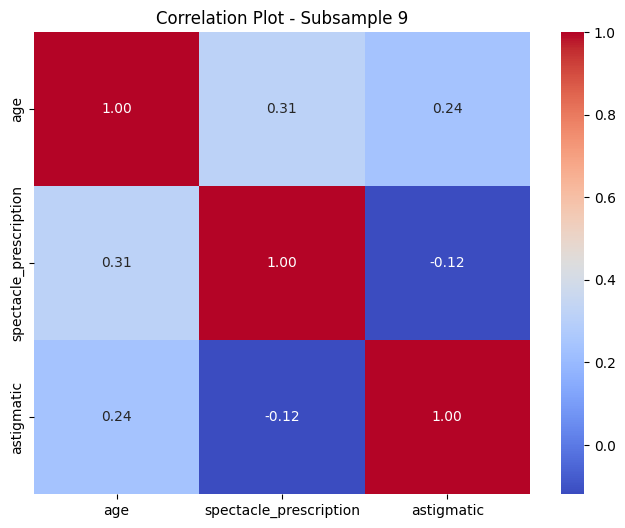

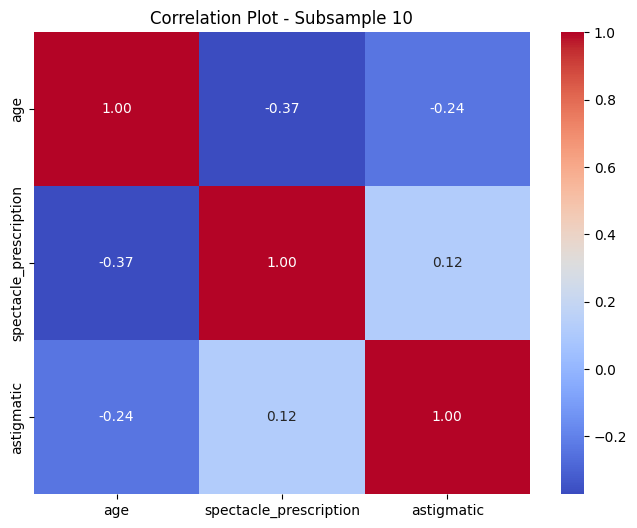

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

lenses = fetch_ucirepo(id=58)

subsample_size = int(len(lenses.data.features) * 0.5)
subsamples = [lenses.data.features.sample(subsample_size) for _ in range(10)]

for i, subsample in enumerate(subsamples, start=1):
    plt.figure(figsize=(8, 6))
    corr = subsample.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f"Correlation Plot - Subsample {i}")
    plt.show()


**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced**
**TASK (Regression): If your problem is a regression problem visually the distribution of your target variabe**

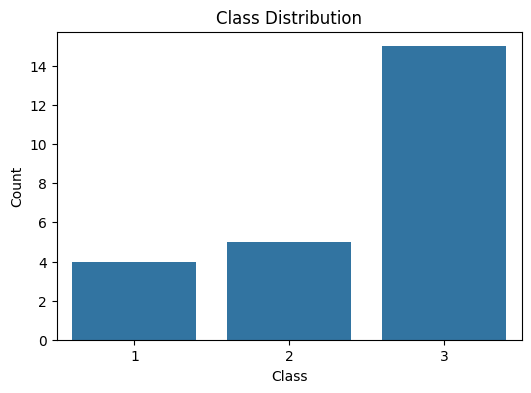

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

lenses = fetch_ucirepo(id=58)

y = lenses.data.targets

if isinstance(y, pd.DataFrame) and y.shape[1] == 1:
    y = y.iloc[:, 0]

class_counts = y.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index.tolist(), y=class_counts.values)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()




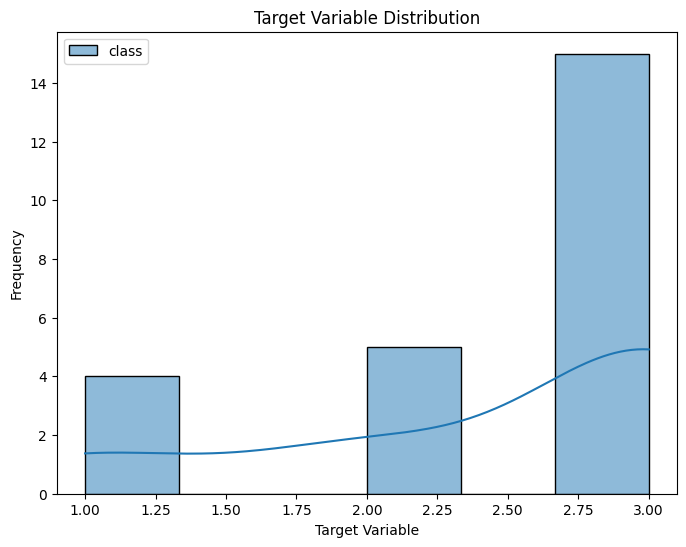

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, color='blue')
plt.title("Target Variable Distribution")
plt.xlabel("Target Variable")
plt.ylabel("Frequency")
plt.show()


**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

<Figure size 1000x800 with 0 Axes>

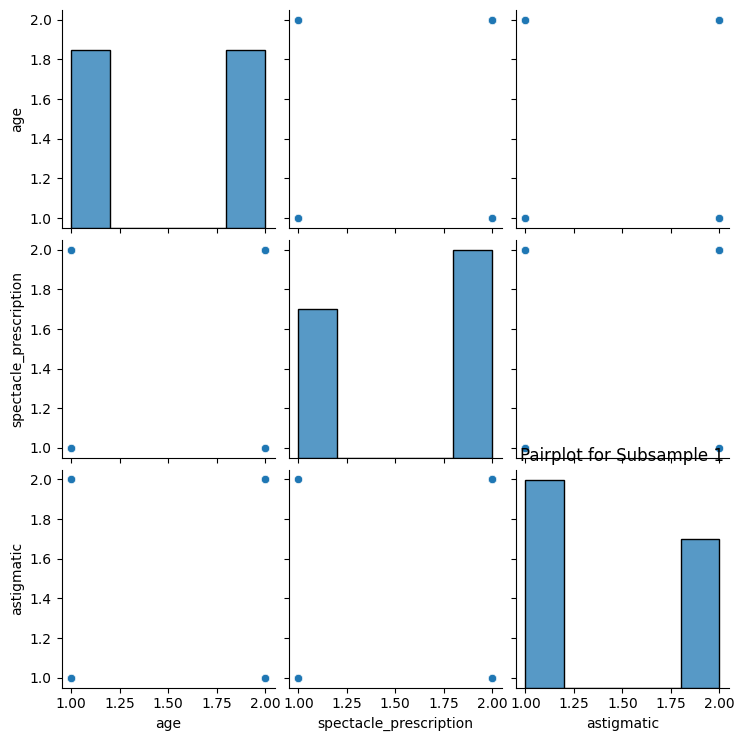

<Figure size 1000x800 with 0 Axes>

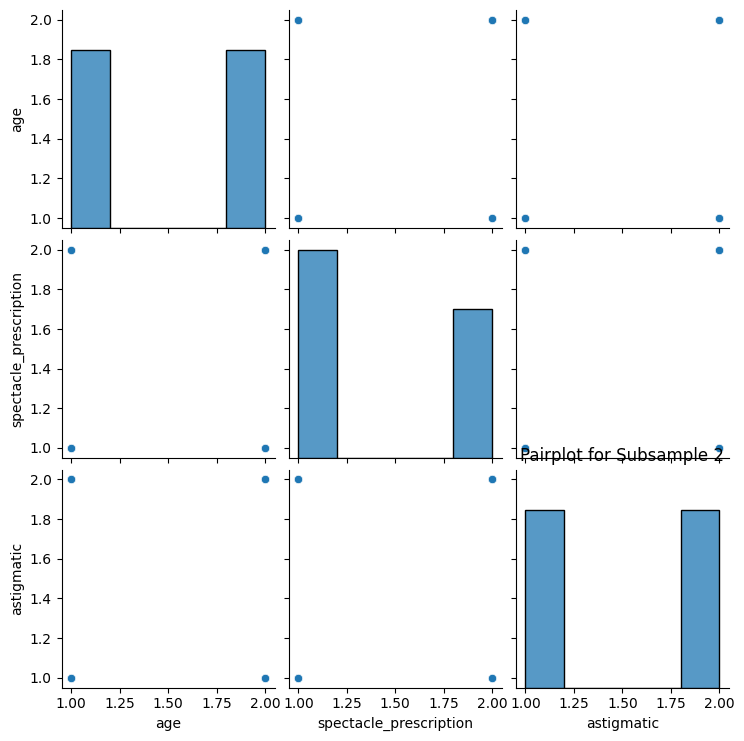

<Figure size 1000x800 with 0 Axes>

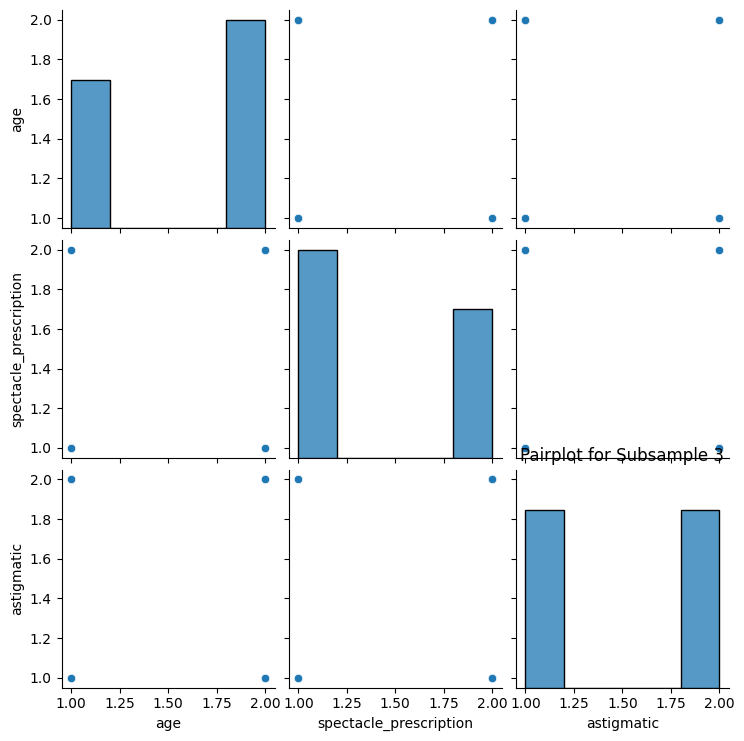

<Figure size 1000x800 with 0 Axes>

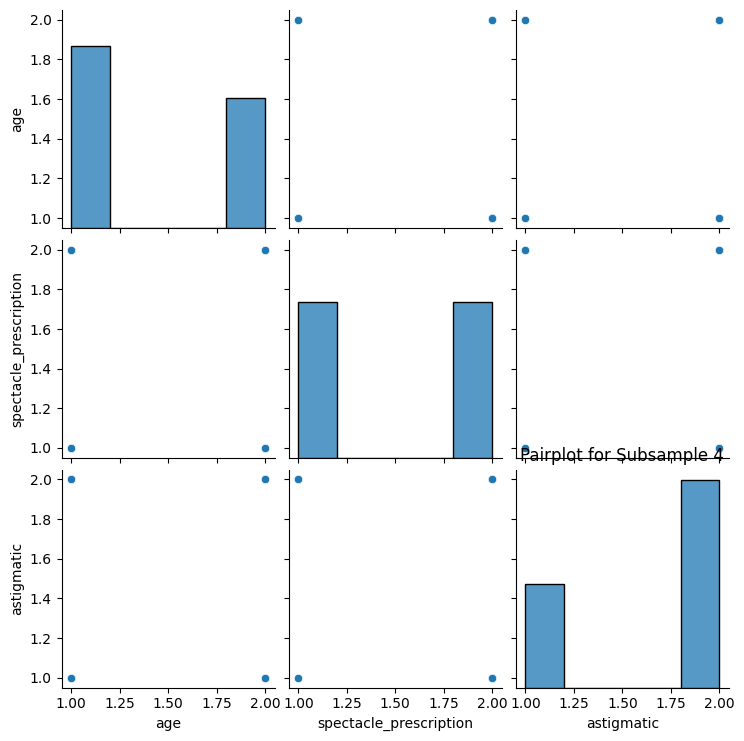

<Figure size 1000x800 with 0 Axes>

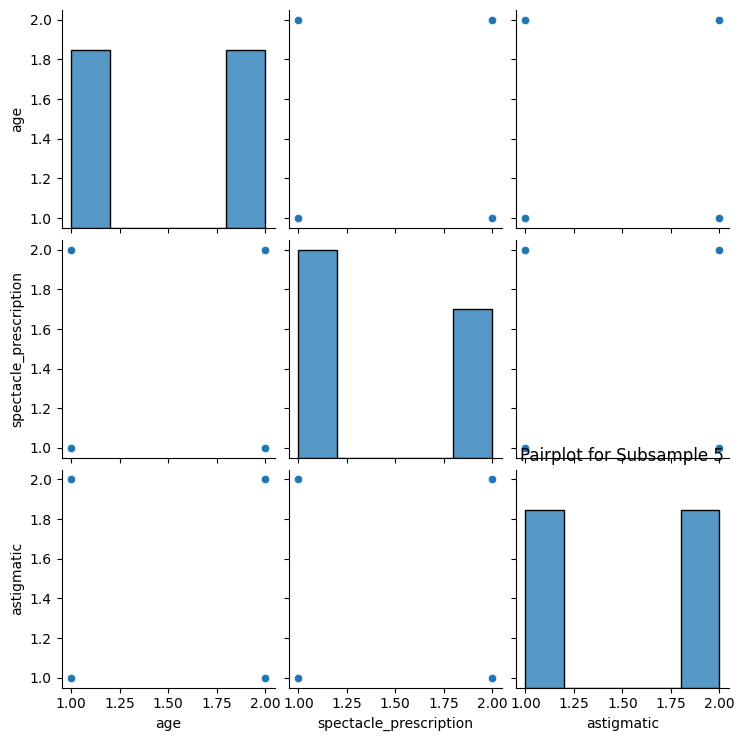

<Figure size 1000x800 with 0 Axes>

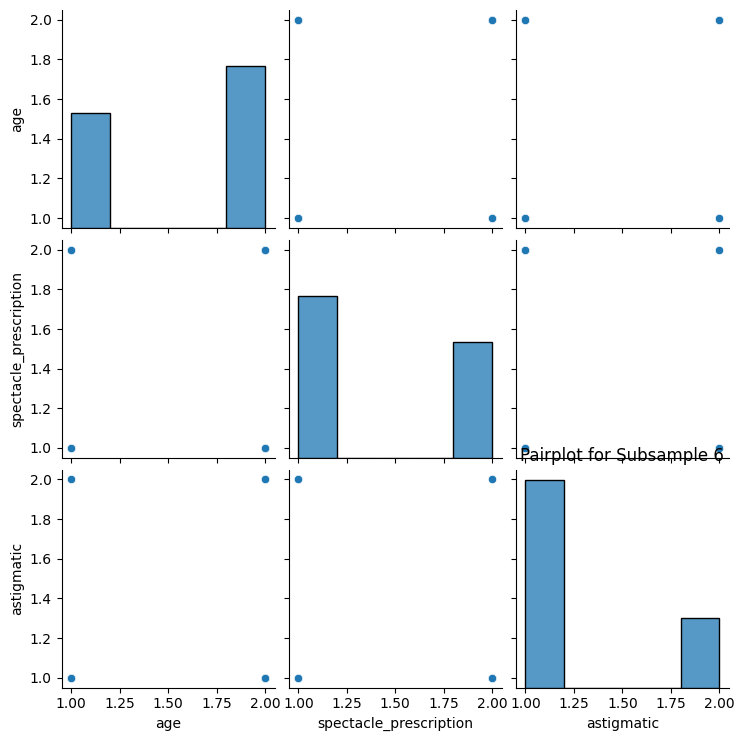

<Figure size 1000x800 with 0 Axes>

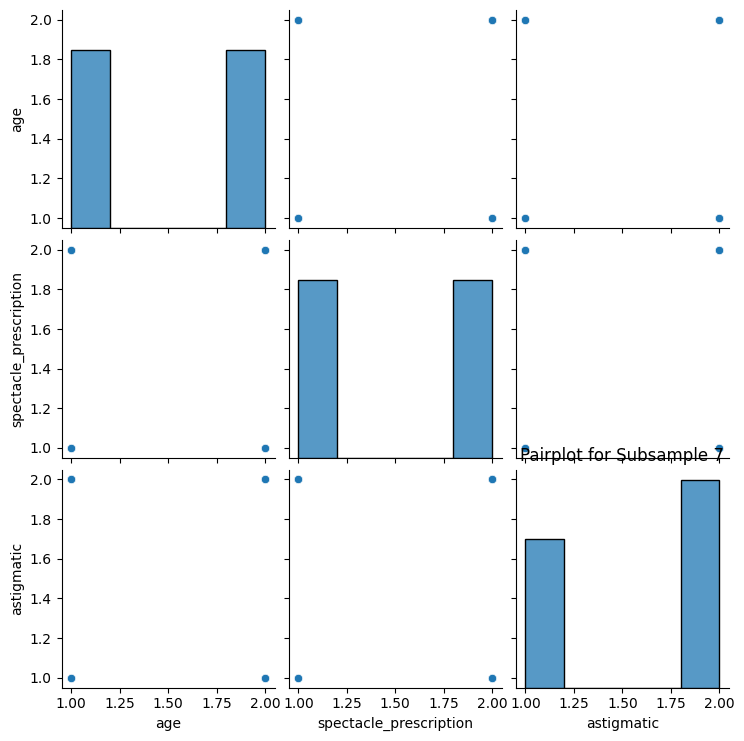

<Figure size 1000x800 with 0 Axes>

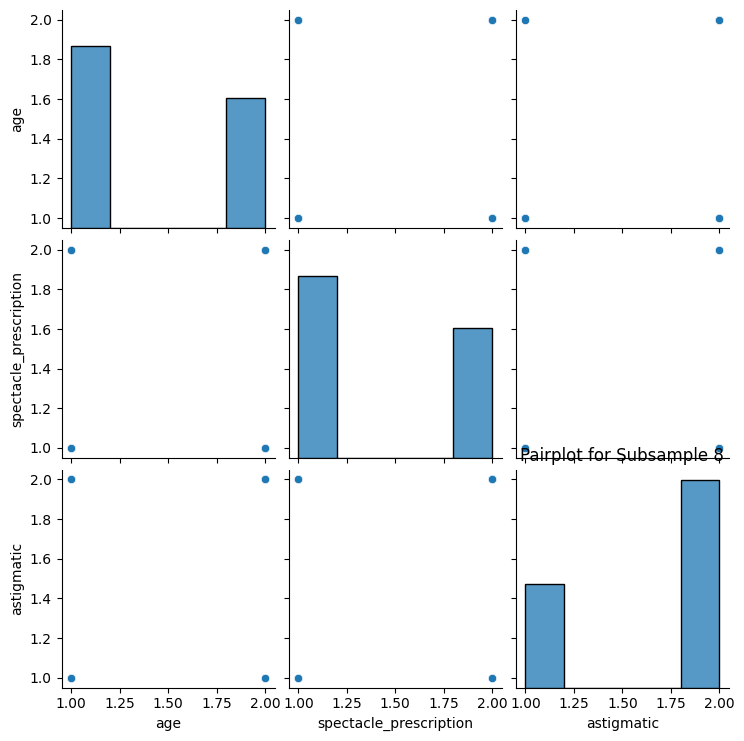

<Figure size 1000x800 with 0 Axes>

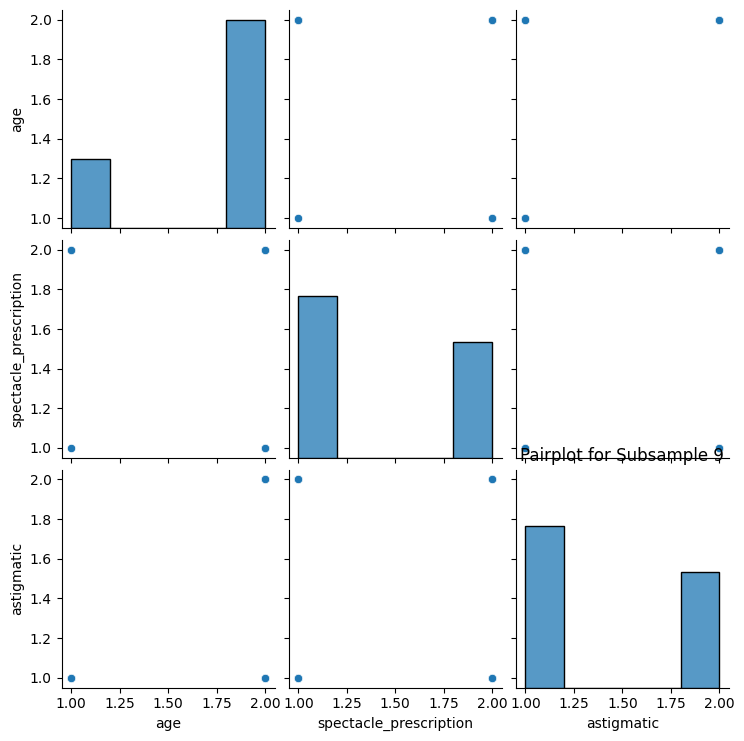

<Figure size 1000x800 with 0 Axes>

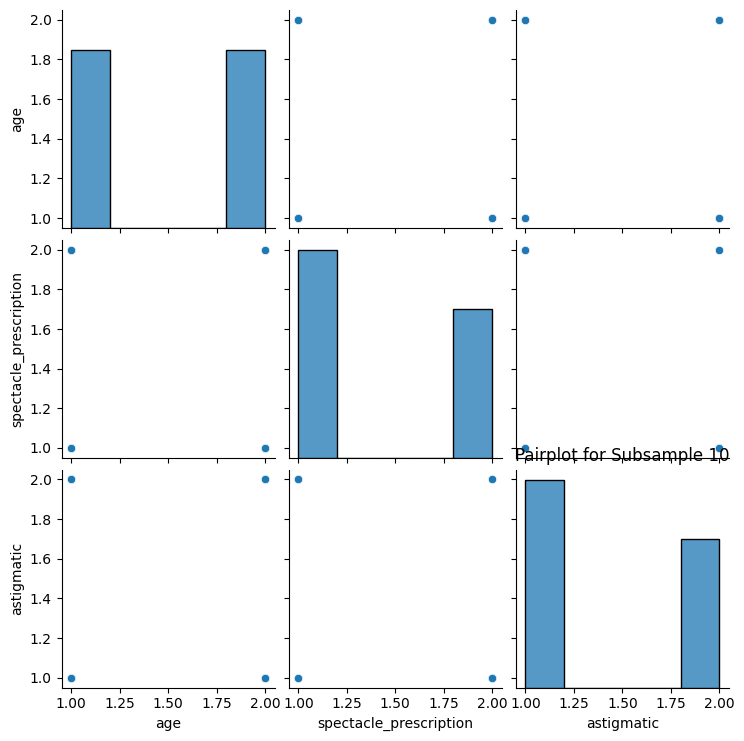

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

lenses = fetch_ucirepo(id=58)

subsample_size = int(len(lenses.data.features) * 0.5)  # Adjust as needed
subsamples = [lenses.data.features.sample(subsample_size) for _ in range(10)]

for i, subsample in enumerate(subsamples, start=1):
    plt.figure(figsize=(10, 8))
    sns.pairplot(subsample, kind='scatter')
    plt.title(f"Pairplot for Subsample {i}")
    plt.show()




**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

<Figure size 1000x800 with 0 Axes>

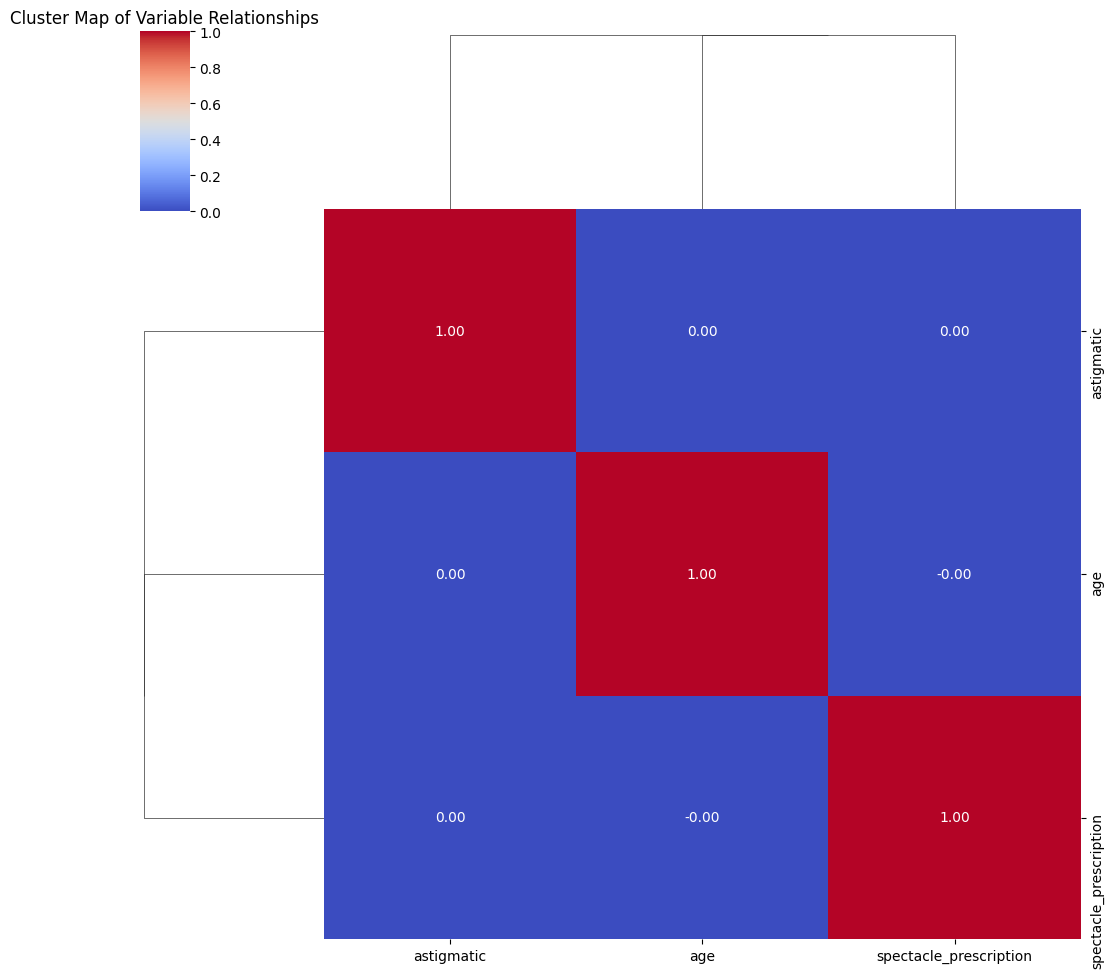

In [11]:
plt.figure(figsize=(10, 8))
sns.clustermap(X.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Cluster Map of Variable Relationships")
plt.show()


**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

svm = SVC()

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_

y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


c:\Users\bryce\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\bryce\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\bryce\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\bryce\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expec

Test Accuracy: 1.0
